
# Bank Marketing Analysis for Term Deposit


In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score
from sklearn.svm import SVC

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import imblearn 
import warnings
from sklearn import preprocessing
warnings.filterwarnings('ignore') 
from sklearn.metrics import f1_score

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) was subscribed or not. Data set has 20 predictor varaibles (features) and around 41K rows. Top 5 rows of the dataset is shown below.

In [138]:
data = pd.read_csv('bank-additional-full.csv', sep = ';')
data.drop(index = 1)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [133]:
# Null values percentage for each column
data.isnull().sum()*100/data.shape[0]

Unnamed: 0        0.000000
age               1.369605
job               1.393178
marital           1.395535
education         1.320101
default           1.343674
housing           1.346031
loan              1.416751
contact           1.386106
month             1.338959
day_of_week       1.357818
duration          1.320101
campaign          1.305957
pdays             1.388463
previous          1.329530
poutcome          1.334245
emp.var.rate      1.379034
cons.price.idx    1.289456
cons.conf.idx     1.327173
euribor3m         1.395535
nr.employed       1.315386
y                 1.430895
dtype: float64

In [134]:
# number of missing values for each row having more than 10 missing values

(data.isnull().sum(axis=1).sort_values(ascending=False) > 10).sum()    

416

In [135]:
data = data[~(data.isnull().sum(axis=1) > 4)]

In [139]:
data.shape

(41188, 21)

# Graphical Analysis

In [8]:
data1 = data[data['y'] == 'yes']
data2 = data[data['y'] == 'no']

In the given dataset, there are 10 categorical variables and 10 continous variables. All categorical variables are visualized using stacked barplots (color coded using OSU colors :) for 'yes' and 'no' outcome of term deposit subscription. Below are the 10 barplots.

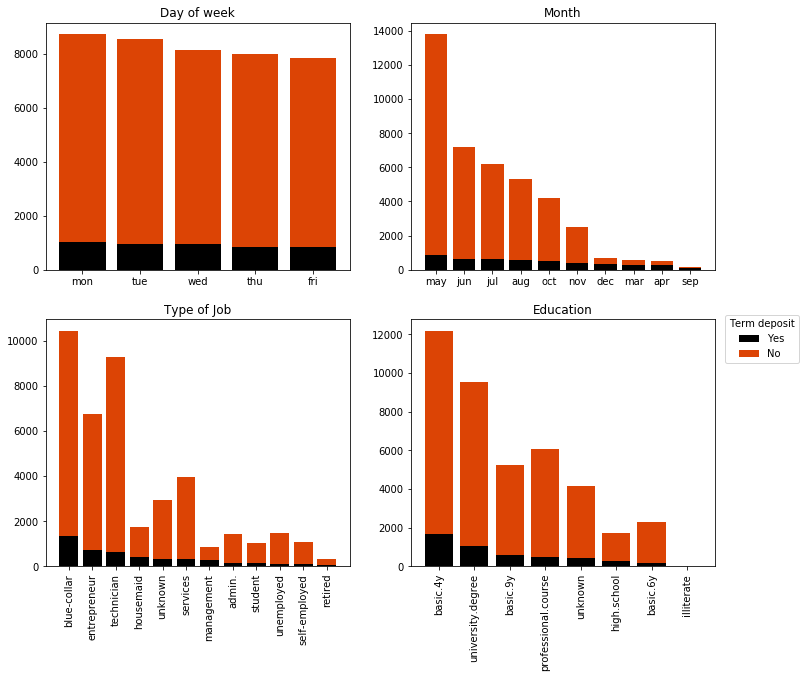

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))

b1 = ax[0, 0].bar(data1['day_of_week'].unique(),height = data1['day_of_week'].value_counts(),color='#000000')
b2 = ax[0, 0].bar(data2['day_of_week'].unique(),height = data2['day_of_week'].value_counts(),bottom = data1['day_of_week'].value_counts(),color = '#DC4405') 
ax[0, 0].title.set_text('Day of week')
#ax[0, 0].legend((b1[0], b2[0]), ('Yes', 'No'))
ax[0, 1].bar(data1['month'].unique(),height = data1['month'].value_counts(),color='#000000')
ax[0, 1].bar(data2['month'].unique(),height = data2['month'].value_counts(),bottom = data1['month'].value_counts(),color = '#DC4405') 
ax[0, 1].title.set_text('Month')
ax[1, 0].bar(data1['job'].unique(),height = data1['job'].value_counts(),color='#000000')
ax[1, 0].bar(data1['job'].unique(),height = data2['job'].value_counts()[data1['job'].value_counts().index],bottom = data1['job'].value_counts(),color = '#DC4405') 
ax[1, 0].title.set_text('Type of Job')
ax[1, 0].tick_params(axis='x',rotation=90)
ax[1, 1].bar(data1['education'].unique(),height = data1['education'].value_counts(),color='#000000') #row=0, col=1
ax[1, 1].bar(data1['education'].unique(),height = data2['education'].value_counts()[data1['education'].value_counts().index],bottom = data1['education'].value_counts(),color = '#DC4405') 
ax[1, 1].title.set_text('Education')
ax[1, 1].tick_params(axis='x',rotation=90)
#ax[0, 1].xticks(rotation=90)
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

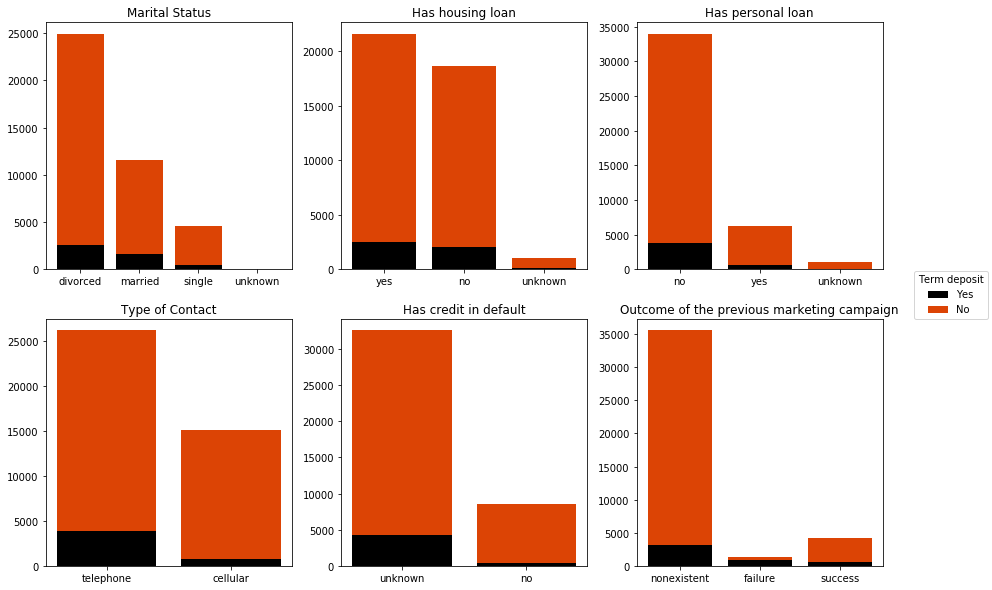

In [10]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))

b1 = ax[0, 0].bar(data1['marital'].unique(),height = data1['marital'].value_counts(),color='#000000')
b2 = ax[0, 0].bar(data1['marital'].unique(),height = data2['marital'].value_counts()[data1['marital'].value_counts().index],bottom = data1['marital'].value_counts(),color = '#DC4405') 
ax[0, 0].title.set_text('Marital Status')
#ax[0, 0].legend((b1[0], b2[0]), ('Yes', 'No'))
ax[0, 1].bar(data1['housing'].unique(),height = data1['housing'].value_counts(),color='#000000')
ax[0, 1].bar(data1['housing'].unique(),height = data2['housing'].value_counts()[data1['housing'].value_counts().index],bottom = data1['housing'].value_counts(),color = '#DC4405') 
ax[0, 1].title.set_text('Has housing loan')
ax[0, 2].bar(data1['loan'].unique(),height = data1['loan'].value_counts(),color='#000000')
ax[0, 2].bar(data1['loan'].unique(),height = data2['loan'].value_counts()[data1['loan'].value_counts().index],bottom = data1['loan'].value_counts(),color = '#DC4405') 
ax[0, 2].title.set_text('Has personal loan')
ax[1, 0].bar(data1['contact'].unique(),height = data1['contact'].value_counts(),color='#000000')
ax[1, 0].bar(data1['contact'].unique(),height = data2['contact'].value_counts()[data1['contact'].value_counts().index],bottom = data1['contact'].value_counts(),color = '#DC4405') 
ax[1, 0].title.set_text('Type of Contact')
ax[1, 1].bar(data1['default'].unique(),height = data1['default'].value_counts(),color='#000000')
ax[1, 1].bar(data1['default'].unique(),height = data2['default'].value_counts()[data1['default'].value_counts().index],bottom = data1['default'].value_counts(),color = '#DC4405') 
ax[1, 1].title.set_text('Has credit in default')
ax[1, 2].bar(data1['poutcome'].unique(),height = data1['poutcome'].value_counts(),color='#000000')
ax[1, 2].bar(data1['poutcome'].unique(),height = data2['poutcome'].value_counts()[data1['poutcome'].value_counts().index],bottom = data1['poutcome'].value_counts(),color = '#DC4405') 
ax[1, 2].title.set_text('Outcome of the previous marketing campaign')
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

All the categories in each categorical variable has disproportinate 'yes' compared to 'no' for term deposit subscription. Only noteworthy mention is that in 'Outcome of the previous marketing campaign' variable, failure category has more 'yes' compared to 'no'. This means, if the previous campaign call failed to get the customers to subscribe, repeated calls got customers to subscribe to term deposit. For 10 continous variables, unstacked histograms are plotted below.

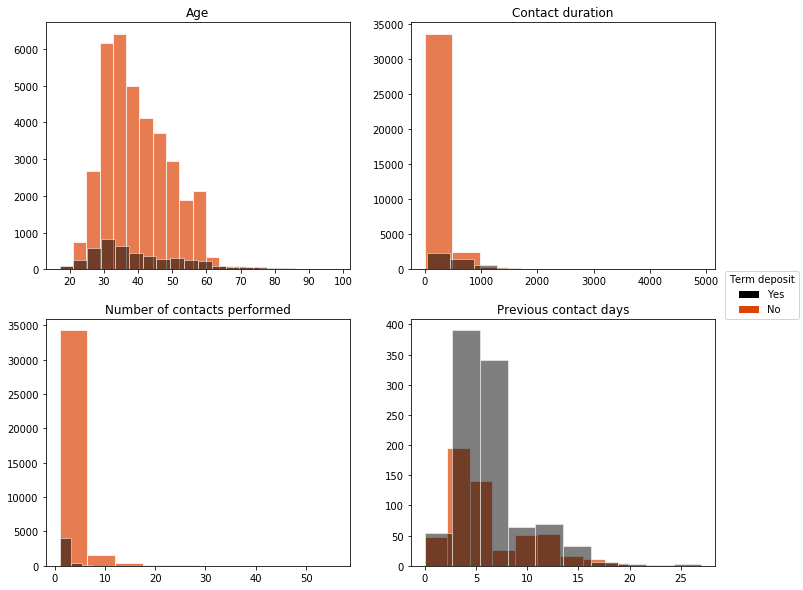

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))

ax[0, 0].hist(data2['age'],color = '#DC4405',alpha=0.7,bins=20, edgecolor='white') 
ax[0, 0].hist(data1['age'],color='#000000',alpha=0.5,bins=20, edgecolor='white')
ax[0, 0].title.set_text('Age')
ax[0, 1].hist(data2['duration'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[0, 1].hist(data1['duration'],color='#000000',alpha=0.5, edgecolor='white')
ax[0, 1].title.set_text('Contact duration')
ax[1, 0].hist(data2['campaign'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 0].hist(data1['campaign'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 0].title.set_text('Number of contacts performed')
ax[1, 1].hist(data2[data2['pdays'] != 999]['pdays'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 1].hist(data1[data1['pdays'] != 999]['pdays'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 1].title.set_text('Previous contact days')
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

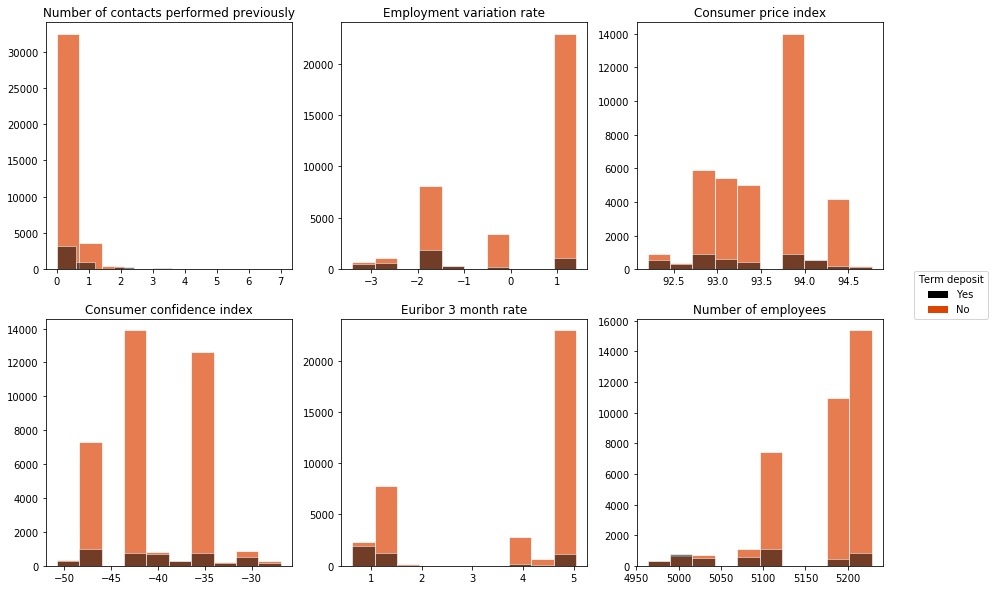

In [12]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))
ax[0, 0].hist(data2['previous'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[0, 0].hist(data1['previous'],color='#000000',alpha=0.5, edgecolor='white')
ax[0, 0].title.set_text('Number of contacts performed previously')
ax[0, 1].hist(data2['emp.var.rate'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[0, 1].hist(data1['emp.var.rate'],color='#000000',alpha=0.5, edgecolor='white')
ax[0, 1].title.set_text('Employment variation rate')
ax[0, 2].hist(data2['cons.price.idx'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[0, 2].hist(data1['cons.price.idx'],color='#000000',alpha=0.5, edgecolor='white')
ax[0, 2].title.set_text('Consumer price index')
ax[1, 0].hist(data2['cons.conf.idx'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 0].hist(data1['cons.conf.idx'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 0].title.set_text('Consumer confidence index')
ax[1, 1].hist(data2['euribor3m'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 1].hist(data1['euribor3m'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 1].title.set_text('Euribor 3 month rate')
ax[1, 2].hist(data2['nr.employed'],color = '#DC4405',alpha=0.7, edgecolor='white') 
ax[1, 2].hist(data1['nr.employed'],color='#000000',alpha=0.5, edgecolor='white')
ax[1, 2].title.set_text('Number of employees')
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

All the histograms show similar behavior (proportion of 'no' is higher than 'yes') except 'Previous contact days'. Proportion of 'yes' is higher compared to 'no' (only if contacted more than once).


In [13]:
#converting all the categorical values to dummies

In [14]:
predictors = data.iloc[:,0:20]
predictors = predictors.drop(['pdays'],axis=1)
y = data.iloc[:,20]
X = pd.get_dummies(predictors)

# Treating Imbalanced Data

Given data set is highly imbalanced, i.e. number of data belonging to 'no' category is way higher than 'yes' category.

In [15]:
y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [16]:
y = y.apply(lambda x : 1 if x == 'yes' else 0)

In [17]:
y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

This imbalance has to treated so as to make sure that there is no bias in modeling. Imbalance is generally treated in three ways. Random Undersampling, Random Oversampling and SMOTE Technique

In [18]:
#SMOTE- Synthetic Minority Oversampling Technique

In [19]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_SMOTE, Y_SMOTE = sm.fit_resample(X, y)
pd.Series(Y_SMOTE).value_counts()

1    36548
0    36548
dtype: int64

In [20]:
# Splitting data into Train and Test

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_SMOTE,Y_SMOTE,
                                                   random_state = 1)
print("X_train shape = "+ str(X_train.shape))
print("X_test shape = "+ str(X_test.shape))
print("Y_train shape = "+ str(Y_train.shape))
print("Y_test shape = "+ str(Y_test.shape))


X_train shape = (54822, 62)
X_test shape = (18274, 62)
Y_train shape = (54822,)
Y_test shape = (18274,)


In [22]:
# Re-scaling the data so that all featurs are approximately on the same scale
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_SMOTE)
X_train_std = sc.transform(X_SMOTE)
X_test_std = sc.transform(X_test)

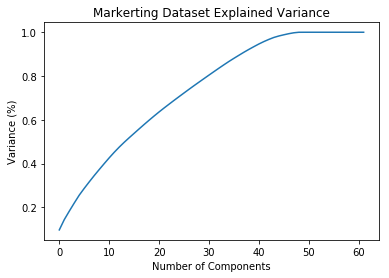

In [33]:
pca_1 = PCA().fit(X_train_std)#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca_1.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Markerting Dataset Explained Variance')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=49)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Classification

# VotingClassifier

In [24]:
#hard

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
log_clf.fit(X_train, Y_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, Y_train)
rf_clf = RandomForestClassifier(n_estimators=50, random_state=1)
rf_clf.fit(X_train,Y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('rf', rf_clf)], voting='hard')
voting_clf.fit(X_train, Y_train)

from sklearn.metrics import accuracy_score

for clf in (log_clf, knn_clf, rf_clf, voting_clf):
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, y_pred))



LogisticRegression 0.877312028017949
KNeighborsClassifier 0.9116230710298785
RandomForestClassifier 0.9519535952719711
VotingClassifier 0.9321987523257087


Hard voting classifier gave us an accuracy of 93%

In [ ]:
# soft

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(X_train, Y_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, Y_train)
rf_clf = RandomForestClassifier(n_estimators=50, random_state=1)
rf_clf.fit(X_train,Y_train)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('rf', rf_clf)], voting='soft')
voting_clf.fit(X_train, Y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, rf_clf, voting_clf):
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, y_pred))







LogisticRegression 0.877312028017949
KNeighborsClassifier 0.9116230710298785
RandomForestClassifier 0.9519535952719711
VotingClassifier 0.9377257305461311


soft voting classifier gave us an accuracy of 93.7%

In [ ]:
# Apply any two models with bagging and any two models with pasting.

# Bagging

In [26]:
# BaggingRegressor with LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
bag_lreg = BaggingClassifier(lg)

bag_lreg.fit(X_train, Y_train)
bag_lreg.score(X_test, Y_test, sample_weight=None)

0.8775856408011382

In [27]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
bag = BaggingClassifier(dtc)

bag.fit(X_train, Y_train)
y_pred = bag.predict(X_test)
bag.score(X_test, Y_test, sample_weight=None)

0.9463718944949108

Decision trees gives 94.6% accuracy compared to Logistic regression while using bagging classifier

# Adaboost Boosting

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dtr = DecisionTreeClassifier()
ada_dtr = AdaBoostClassifier(dtr, n_estimators=300)

ada_dtr.fit(X_train, Y_train)
ada_dtr.score(X_test, Y_test, sample_weight=None)

0.934223486921309

In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
ada_lreg = AdaBoostClassifier(LogisticRegression())

ada_lreg.fit(X_train, Y_train)
ada_lreg.score(X_test, Y_test, sample_weight=None)

0.8374192842289592

Decision trees gives 93.4% accuracy compared to Logistic regression while using AdaBoost classifier

# Gradient Boosting

In [30]:
#GradientBoostingClassifier

from  sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbc.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=3,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [31]:
gbc.score(X_test, Y_test, sample_weight=None)

0.8625369377257306

# Pasting

In [32]:
# pasting

In [33]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
bag_lreg = BaggingClassifier(lg, bootstrap=False)

bag_lreg.fit(X_train, Y_train)
bag_lreg.score(X_test, Y_test, sample_weight=None)

0.877312028017949

In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
bag = BaggingClassifier(dtc, bootstrap=False)

bag.fit(X_train, Y_train)
y_pred = bag.predict(X_test)
bag.score(X_test, Y_test, sample_weight=None)

0.9364123891868228

Decision trees outperforms Logistic regression with 93.6% while using AdaBoost classifier

# Deeplearning

In [35]:
#Apply deep learning models covered in class

In [34]:
from tensorflow import keras
import keras

In [109]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(62,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

In [110]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [111]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=62))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [112]:
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
54822/54822 [==============================] - 3s 54us/step - loss: 8.0787 - acc: 0.4988
Epoch 2/10
54822/54822 [==============================] - 2s 43us/step - loss: 8.0787 - acc: 0.4988
Epoch 3/10
54822/54822 [==============================] - 2s 43us/step - loss: 8.0787 - acc: 0.4988
Epoch 4/10
54822/54822 [==============================] - 2s 43us/step - loss: 8.0787 - acc: 0.4988
Epoch 5/10
54822/54822 [==============================] - 2s 44us/step - loss: 8.0787 - acc: 0.4988
Epoch 6/10
54822/54822 [==============================] - 2s 43us/step - loss: 8.0787 - acc: 0.4988
Epoch 7/10
54822/54822 [==============================] - 2s 43us/step - loss: 8.0787 - acc: 0.4988
Epoch 8/10
54822/54822 [==============================] - 2s 43us/step - loss: 8.0787 - acc: 0.4988
Epoch 9/10
54822/54822 [==============================] - 2s 44us/step - loss: 8.0787 - acc: 0.4988
Epoch 10/10
54822/54822 [==============================] - 2s 45us/step - loss: 8.0787 - acc: 0.4988

In [113]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 32)                2016      
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 33        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________


In [114]:
model.get_config()

[{'class_name': 'Dense',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'batch_input_shape': (None, 62),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'dtype': 'float32',
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'name': 'dense_33',
   'trainable': True,
   'units': 32,
   'use_bias': True}},
 {'class_name': 'Dense',
  'config': {'activation': 'sigmoid',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kerne

In [115]:
score = model.evaluate(X_test, Y_test)

18274/18274 [==============================] - 1s 31us/step


In [108]:
score[1]

0.4963335887052643

In [49]:
#Using F1 score as the evaluating metric.Since the data is imbalanced 

In [ ]:
# logistic without pca 

In [28]:
#logistic regression using GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

grid={"C":[0.01,0.05,1], "penalty":["l1","l2"]}

logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=2,scoring='f1')
logreg_cv.fit(X_train,Y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l1'}
accuracy : 0.8790591423672951


In [31]:
Y_true, Y_pred = Y_test, logreg_cv.predict(X_test)
f1_score(Y_true, Y_pred) 

0.8776297907039956

In [ ]:
# logistic with pca

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

grid={"C":[0.01,0.05,0.1,0.5,0.8,1], "penalty":["l1","l2"]}

logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=3,scoring='f1')
logreg_cv.fit(X_train_pca,Y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'penalty': 'l1', 'C': 0.5}
accuracy : 0.8793912491396613


In [84]:
Y_true, Y_pred = Y_test, logreg_cv.predict(X_test_pca)
f1_score(Y_true, Y_pred) 

0.8782419967444384

In [ ]:
# KNN without pca

In [27]:
# KNN using grid search cv
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
#Hyper Parameters Set
params = {'n_neighbors':[5,7,9],
          'leaf_size':[2,3,5],
          'weights':['uniform', 'distance']
         }

knn = GridSearchCV(model, param_grid=params,cv=2, n_jobs=-1,scoring='f1')
knn.fit(X_train,Y_train)

print("tuned hpyerparameters :(best parameters) ",knn.best_params_)
print("accuracy :",knn.best_score_)

tuned hpyerparameters :(best parameters)  {'leaf_size': 2, 'n_neighbors': 5, 'weights': 'distance'}
accuracy : 0.9117775971386014


In [31]:
Y_true, Y_pred = Y_test, knn.predict(X_test)

In [32]:
f1_score(Y_true, Y_pred)

0.9253839018860147

In [ ]:
# KNN with pca

In [85]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
#Hyper Parameters Set
params = {'n_neighbors':[5,7,9],
          'leaf_size':[2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto']
         }

knn = GridSearchCV(model, param_grid=params, n_jobs=1,scoring='f1')
knn.fit(X_train_pca,Y_train)

print("tuned hpyerparameters :(best parameters) ",knn.best_params_)
print("accuracy :",knn.best_score_)

tuned hpyerparameters :(best parameters)  {'n_neighbors': 5, 'leaf_size': 2, 'weights': 'distance', 'algorithm': 'auto'}
accuracy : 0.9170596439744515


In [86]:
Y_true, Y_pred = Y_test, knn.predict(X_test_pca)

In [87]:
f1_score(Y_true, Y_pred)

0.9253362188900912

In [ ]:
# Decision Tree without pca

In [36]:
from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier(random_state=0)
#Hyper Parameters Set
params = {'min_samples_split': [2,4,6], 
          'min_samples_leaf':[1,3,5],
          'random_state':[0]}
#Making models with hyper parameters sets
dt = GridSearchCV(model, param_grid=params,cv=2, n_jobs=-1, scoring='f1')
#Learning
dt.fit(X_train,Y_train)

print("tuned hpyerparameters :(best parameters) ",dt.best_params_)
print("accuracy :",dt.best_score_)

tuned hpyerparameters :(best parameters)  {'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}
accuracy : 0.9293712412441699


In [37]:
Y_true, Y_pred = Y_test, dt.predict(X_test)

In [38]:
f1_score(Y_true, Y_pred)

0.9340296866410116

In [ ]:
# Decision Tree with pca

In [88]:
from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier(random_state=0)
#Hyper Parameters Set
params = {'min_samples_split': [2,4,6], 
          'min_samples_leaf':[1,3,5],
          'random_state':[0]}
#Making models with hyper parameters sets
dt = GridSearchCV(model, param_grid=params, n_jobs=-1,scoring='f1')
#Learning
dt.fit(X_train_pca,Y_train)

print("tuned hpyerparameters :(best parameters) ",dt.best_params_)
print("accuracy :",dt.best_score_)

tuned hpyerparameters :(best parameters)  {'random_state': 0, 'min_samples_leaf': 1, 'min_samples_split': 2}
accuracy : 0.9086653197924252


In [89]:
Y_true, Y_pred = Y_test, dt.predict(X_test_pca)

In [90]:
f1_score(Y_true, Y_pred)

0.9200805179261193

In [ ]:
# Linear Support Vector Machine without pca

In [42]:
from sklearn.svm import LinearSVC

model = LinearSVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1]}

svc = GridSearchCV(model, param_grid,cv=2, n_jobs=-1,scoring='f1', return_train_score=True)
svc.fit(X_train, Y_train)
svc.score(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ",svc.best_params_)
print("accuracy :",svc.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1}
accuracy : 0.822868583121091


In [43]:
Y_true, Y_pred = Y_test, svc.predict(X_test)

In [44]:
f1_score(Y_true, Y_pred)

0.836104735584805

In [ ]:
# Linear Support Vector Machine with pca

In [91]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

model = LinearSVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1]}

svc_l = GridSearchCV(model, param_grid, cv = 2, n_jobs=-1, scoring='f1', return_train_score=True)
svc_l.fit(X_train_pca, Y_train)
svc_l.score(X_train_pca, Y_train)

print("tuned hpyerparameters :(best parameters) ",svc_l.best_params_)
print("accuracy :",svc_l.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001}
accuracy : 0.8766257440108799


In [92]:
Y_true, Y_pred = Y_test, svc_l.predict(X_test_pca)

In [93]:
f1_score(Y_true, Y_pred)

0.876577840112202

In [ ]:
# svm without pca

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC()
param_grid = {'C':[0.001, 0.01, 0.1,1], 'gamma' : [0.2,0.7, 1],
             'kernel': ['rbf','linear','poly']}

svc_rbf = GridSearchCV(model, param_grid,cv=2, n_jobs=-1,scoring='f1', return_train_score=True)
svc_rbf.fit(X_train, Y_train)
svc_rbf.score(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ",svc_rbf.best_params_)
print("accuracy :",svc_rbf.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
accuracy : 0.8624212355717604


In [27]:
Y_true, Y_pred = Y_test, svc_rbf.predict(X_test)
f1_score(Y_true, Y_pred)

0.9249428722095271

In [ ]:
# svm with pca

In [94]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
model = SVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1], 'gamma' : [0.2, 0.7, 1],
             'kernel': ['rbf','linear','poly']}

svm = GridSearchCV(model, param_grid,cv=2, n_jobs=-1,scoring='f1', return_train_score=True)
svm.fit(X_train_pca, Y_train)
svm.score(X_train_pca, Y_train)

print("tuned hpyerparameters :(best parameters) ",svm.best_params_)
print("accuracy :",svm.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'kernel': 'rbf', 'gamma': 0.2}
accuracy : 0.8624676162119403


In [95]:
Y_true, Y_pred = Y_test, svm.predict(X_test_pca)
f1_score(Y_true, Y_pred)

0.9249428722095271

In [ ]:
#RandomForest Classifier without pca

In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
param_grid = {'max_depth': [10, 50,100],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 600, 1000, 2000]}

rf = GridSearchCV(model, param_grid,cv=2, n_jobs=-1,scoring='f1', return_train_score=True)
rf.fit(X_train, Y_train)
rf.score(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ",rf.best_params_)
print("accuracy :",rf.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 50, 'min_samples_split': 10, 'n_estimators': 1000}
accuracy : 0.9527083859820824


In [33]:
Y_true, Y_pred = Y_test, rf.predict(X_test)
f1_score(Y_true, Y_pred)

0.9520200612984118

In [34]:
#RandomForest Classifier with pca

In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
param_grid = {'max_depth': [10, 50,100],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 600, 1000, 2000]}

rf = GridSearchCV(model, param_grid,cv=2, n_jobs=-1,scoring='f1', return_train_score=True)
rf.fit(X_train_pca, Y_train)
rf.score(X_train_pca, Y_train)

print("tuned hpyerparameters :(best parameters) ",rf.best_params_)
print("accuracy :",rf.best_score_)

tuned hpyerparameters :(best parameters)  {'n_estimators': 600, 'max_depth': 100, 'min_samples_split': 2}
accuracy : 0.9395801997465589


In [28]:
Y_true, Y_pred = Y_test, rf.predict(X_test_pca)
f1_score(Y_true, Y_pred)

0.9517101542073529

In [32]:
# Summary of Model performance

d = [['logistic', 0.8791308870348742, 0.8775210655069312,0.8793912491396613,0.8782419967444384],
['KNN',0.9117775971386014,0.9253839018860147,0.9170596439744515,0.9253362188900912],
['Decision Tree',0.9293712412441699,0.9340296866410116,0.9086653197924252,0.9200805179261193],
['LinearSVC',0.8649766428911743,0.6780041113810503,0.8766257440108799,0.876577840112202],
['SVC_rbf',0.8624212355717604,0.9249428722095271,0.8624676162119403,0.9249428722095271],
['RandForest',0.9525178439315252,0.9517172167707404,0.9395801997465589,0.9517101542073529]]
c = ['Model', 'Accuracy', 'F1-Score','Accuracy_PCA','F1_Score_PCA']
x = pd.DataFrame(d, columns=c)
x.head(6)

,Model,Accuracy,F1-Score,Accuracy_PCA,F1_Score_PCA
0,logistic,0.879131,0.877521,0.879391,0.878242
1,KNN,0.911778,0.925384,0.917060,0.925336
2,Decision Tree,0.929371,0.934030,0.908665,0.920081
3,LinearSVC,0.864977,0.678004,0.876626,0.876578
4,SVC_rbf,0.862421,0.924943,0.862468,0.924943
5,RandForest,0.952518,0.951717,0.939580,0.951710


The models before and after applying PCA to the given data gave almost the same F1-Score. But in case of Linear SVC with PCA outperformed the baseline model with 87.6% 

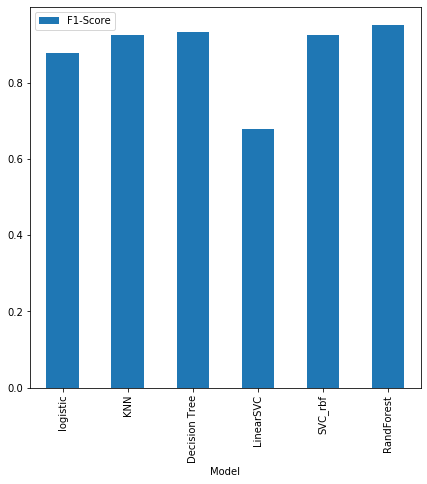

In [38]:
x.plot(x='Model', y = 'F1-Score', kind = 'bar', sort_columns=True, figsize=(7,7))

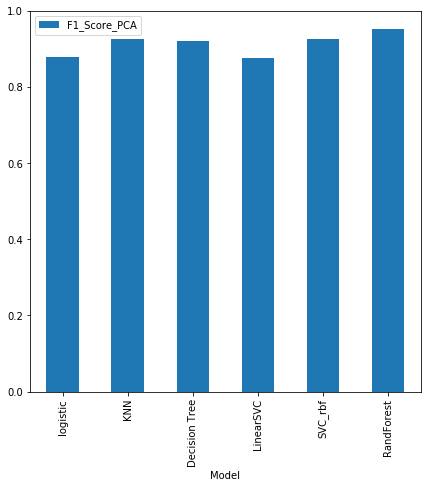

In [117]:
x.plot(x='Model', y = 'F1_Score_PCA', kind = 'bar', sort_columns=True, figsize=(7,7))

# Conclusion

For the given data, visualization of data, ways to treat imbalance in the data and best predictive model to determine the term deposit subscription was explored. From visualization, it can be derived that repeated campaign calls to customers within 20 days of previous call increases the subscription. After treating the imbalance in data using SMOTE, RandomForest performs the best in terms of F1-score(0.95) and Gridsearch cv Accuracy(0.95).

Solutions for the Next Marketing Campaign :

1) Months of Marketing Activity: We saw that the the month of highest level of marketing activity was the month of May. However, this was the month that potential clients tended to reject term deposits offers (Lowest effective rate: -34.49%). For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of March, September, October and December. (December should be under consideration because it was the month with the lowest marketing activity, there might be a reason why december is the lowest.)

2) Seasonality: Potential clients opted to suscribe term deposits during the seasons of fall and winter. The next marketing campaign should focus its activity throghout these seasons.

3) Campaign Calls: A policy should be implemented that states that no more than 3 calls should be applied to the same potential client in order to save time and effort in getting new potential clients. Remember, the more we call the same potential client, the likely he or she will decline to open a term deposit.

4) Age Category: The next marketing campaign of the bank should target potential clients in their 20s or younger and 60s or older. The youngest category had a 60% chance of suscribing to a term deposit while the eldest category had a 76% chance of suscribing to a term deposit. It will be great if for the next campaign the bank addressed these two categories and therefore, increase the likelihood of more term deposits suscriptions.

5) Occupation: Not surprisingly, potential clients that were students or retired were the most likely to suscribe to a term deposit. Retired individuals, tend to have more term deposits in order to gain some cash through interest payments. Remember, term deposits are short-term loans in which the individual (in this case the retired person) agrees not to withdraw the cash from the bank until a certain date agreed between the individual and the financial institution. After that time the individual gets its capital back and its interest made on the loan. Retired individuals tend to not spend bigly its cash so they are morelikely to put their cash to work by lending it to the financial institution. Students were the other group that used to suscribe term deposits.

6) House Loans and Balances: Potential clients in the low balance and no balance category were more likely to have a house loan than people in the average and high balance category. What does it mean to have a house loan? This means that the potential client has financial compromises to pay back its house loan and thus, there is no cash for he or she to suscribe to a term deposit account. However, we see that potential clients in the average and hih balances are less likely to have a house loan and therefore, more likely to open a term deposit. Lastly, the next marketing campaign should focus on individuals of average and high balances in order to increase the likelihood of suscribing to a term deposit.

7) Develop a Questionaire during the Calls: Since duration of the call is the feature that most positively correlates with whether a potential client will open a term deposit or not, by providing an interesting questionaire for potential clients during the calls the conversation length might increase. Of course, this does not assure us that the potential client will suscribe to a term deposit! Nevertheless, we don't loose anything by implementing a strategy that will increase the level of engagement of the potential client leading to an increase probability of suscribing to a term deposit, and therefore an increase in effectiveness for the next marketing campaign the bank will excecute.

8) Target individuals with a higher duration (above 375): Target the target group that is above average in duration, there is a highly likelihood that this target group would open a term deposit account. The likelihood that this group would open a term deposit account is at 78% which is pretty high. This would allow that the success rate of the next marketing campaign would be highly successful.

By combining all these strategies and simplifying the market audience the next campaign should address, it is likely that the next marketing campaign of the bank will be more effective than the current one.
